# Introduce to neural network classificaiton with TensorFlow

In this notebook we're going to learn how to write neural for classification problem.

A classification is where you try to classify something as one or another.

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import random
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model

In [4]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [5]:
# Check the feature
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
# Check lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand reight now... let's visaulize it!

In [7]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


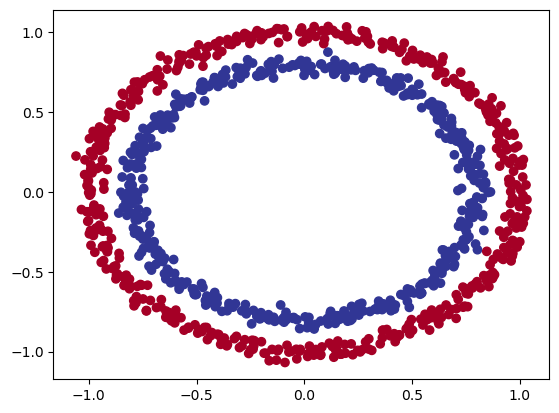

In [8]:
# Visaulize with plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [9]:
# Check the shapes of our features and lables
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# How many samples are we working
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and lables
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Stpes in modeling

The stpes in modeling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [12]:
# Set the random seed
tf.random.set_seed(42)

# Creat a model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer="SGD",
    metrics=["accuracy"]
)

# Fit the model
model_1.fit(X, y, epochs=5, verbose=1)

Epoch 1/5
32/32 [==============================] - 0s 546us/step - loss: 4.4042 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 415us/step - loss: 3.9796 - accuracy: 0.4750
Epoch 3/5
 1/32 [..............................] - ETA: 0s - loss: 7.4658 - accuracy: 0.4688

2024-01-27 14:26:56.598142: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 443us/step - loss: 5.5742 - accuracy: 0.5650
Epoch 4/5
32/32 [==============================] - 0s 365us/step - loss: 4.9833 - accuracy: 0.5440
Epoch 5/5
32/32 [==============================] - 0s 342us/step - loss: 5.9843 - accuracy: 0.5080


In [13]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 402us/step - loss: 6.2559 - accuracy: 0.5080


[6.255902290344238, 0.5080000162124634]

In [14]:
# Let's try training the model for longer
tf.random.set_seed(42)

# Build a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer="SGD",
    metrics=["accuracy"]
)

# Fit the model
model_2.fit(X, y, epochs=200, verbose=0)

In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 345us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... It is perorming as it is guessing.

So, let us add more layers.

In [16]:
tf.random.set_seed(42)

# Build a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer="SGD",
    metrics=["accuracy"]
)

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [17]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 366us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933436989784241, 0.5]

### Improving our model

Let's look into how can we improve our model.

1. Create a model - we might want to add more layers or increase hidden units.
2. Compiling a model - we might want to choose difference optimizer function Adam maybe?
3. Fiting a model - we might more epochs (training longer)

In [18]:
tf.random.set_seed(42)

# Build a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_4.fit(X, y, epochs=100, verbose=0)

In [19]:
"""
We still getting 50% accuracy!!
"""

model_4.evaluate(X, y)

32/32 [==============================] - 0s 364us/step - loss: 0.6948 - accuracy: 0.5130


[0.6948224306106567, 0.5130000114440918]

To visulize our model's prediction, let's create a function `plot_decision_boundary()` this function will:

* Take in atrained model, features (X) and lables (y)
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones

In [20]:
def plot_decision_boundary(model, X, y):
    """
    Plot the decision boundary
    """

    # Define the axis of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multi-calss")

        # We have to reshape
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, camp=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 233us/step
Doing binary classification


/var/folders/_c/y_k3mtf11yd6b_zcfzl41n640000gn/T/ipykernel_28635/244295070.py:32: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx, yy, y_pred, camp=plt.cm.RdYlBu, alpha=0.7)


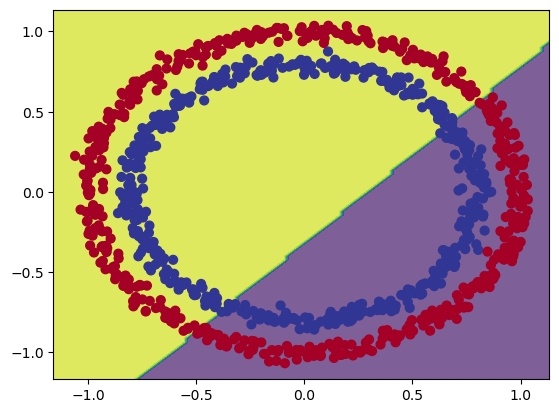

In [21]:
# Check out the prediction
plot_decision_boundary(model_4, X, y)

In [22]:
# Let's see if our model can be used for regression data problem...
tf.random.set_seed(42)

# Create som regression data
X_regression = tf.constant(np.linspace(0, 1000, 200))
y_regression = tf.constant(np.linspace(100, 1100, 200))

# Split our regression data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model
"""
Regression problem the model must be changed!!
"""
# model_4.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

X_regression.shape, y_regression.shape


(TensorShape([200]), TensorShape([200]))

In [23]:
tf.random.set_seed(42)

# Build a model
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)  
])

# Compile a model
model_reg.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["mae"]
)

# Fit the model
model_reg.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)


2/2 [==============================] - 0s 1ms/step


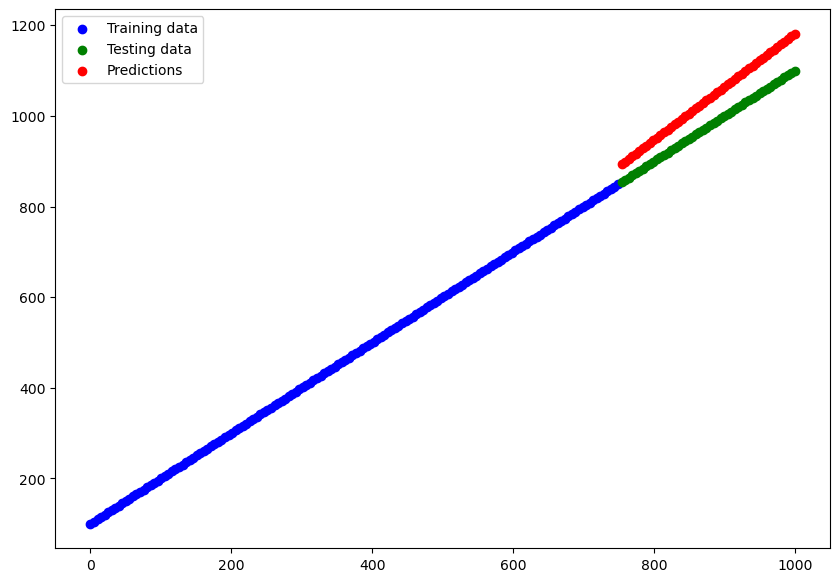

In [24]:

# Make predictions with our trained model
y_reg_preds = model_reg.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();


## The missing piece: Non-Linearity

In [25]:
# Set the random seed
tf.random.set_seed(42)

# Build a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile a model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

In [26]:
# Evaluate it
model_5.evaluate(X, y)

32/32 [==============================] - 0s 368us/step - loss: 0.5236 - accuracy: 0.8090


[0.52357017993927, 0.8090000152587891]

313/313 [==============================] - 0s 231us/step
Doing binary classification


/var/folders/_c/y_k3mtf11yd6b_zcfzl41n640000gn/T/ipykernel_28635/244295070.py:32: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx, yy, y_pred, camp=plt.cm.RdYlBu, alpha=0.7)


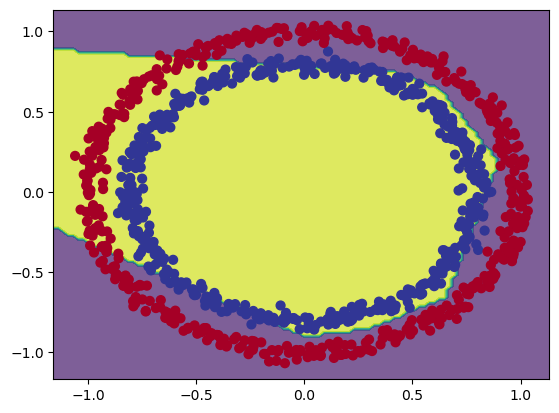

In [27]:
# Let's visuallize this metrix
plot_decision_boundary(model_5, X, y)

**Question** Are we really evaluating our model correctly?
> Hint: What data did the model learn on and what data we predict on?

**Note:** The combination with **non-linear and linear** is one of the key of neural networks.

Now we've discussed the concept of linear and non-linear functions, let us see them in action.

In [28]:
# We create a toy tensor(similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

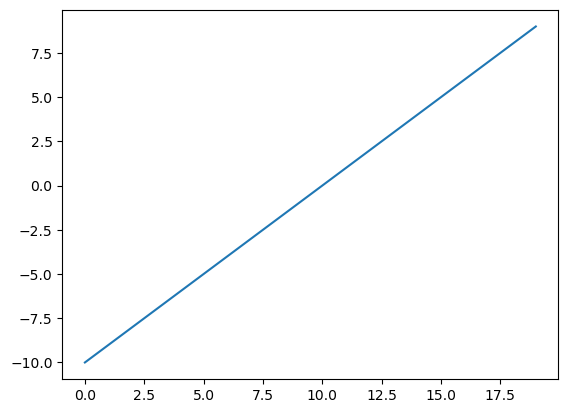

In [29]:
# Visuallize our toy tensor
plt.plot(A);

In [30]:
# let's start by replicating sigmoid
def sigmoid(x):
    return 1/(1+tf.exp(-x))

# Use sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535017e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

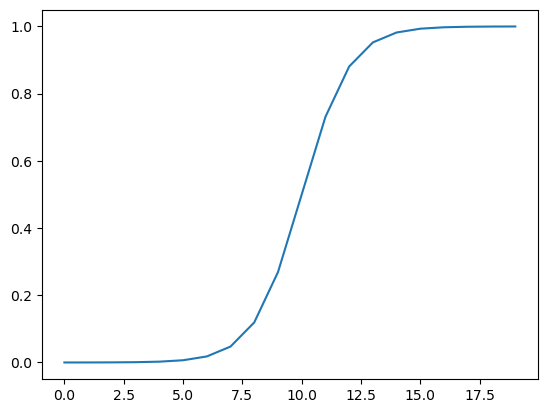

In [31]:
# Plot our toy tensor transfer by sigmoid
plt.plot(sigmoid(A));

In [32]:
# Let's recreate relu function
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

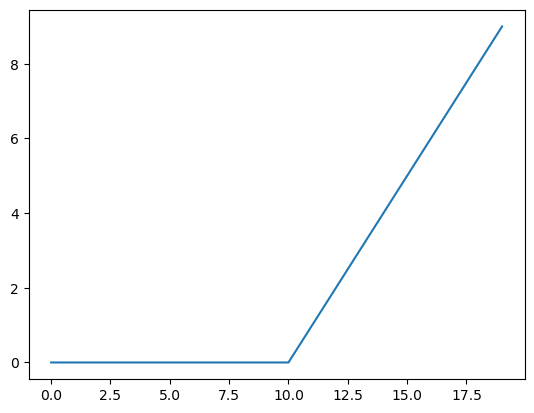

In [33]:
# Visuallize the relu(A)
plt.plot(relu(A))

### Evaluation and improving our classification

So far we've been training on the same dataset...

However, in machine learning this is bascially a sin.

So let's create a training and test set.

In [34]:
# Check how many samples we have
len(X)

1000

In [35]:
#Split into train and test set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [36]:
# Let's recreate a model to fit on the training data and evaluate on test data

# Set seed
tf.random.set_seed(42)

# Build a model
model_final = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile a model
model_final.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(0.01),
    metrics=["accuracy"]
)

# Fit the model
history = model_final.fit(X_train, y_train, epochs=25, verbose=0)

In [37]:
# Evaluate it
model_final.evaluate(X_test, y_test)

7/7 [==============================] - 0s 581us/step - loss: 0.5082 - accuracy: 0.6950


[0.5081585645675659, 0.6949999928474426]

313/313 [==============================] - 0s 271us/step
Doing binary classification
313/313 [==============================] - 0s 222us/step
Doing binary classification


/var/folders/_c/y_k3mtf11yd6b_zcfzl41n640000gn/T/ipykernel_28635/244295070.py:32: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx, yy, y_pred, camp=plt.cm.RdYlBu, alpha=0.7)


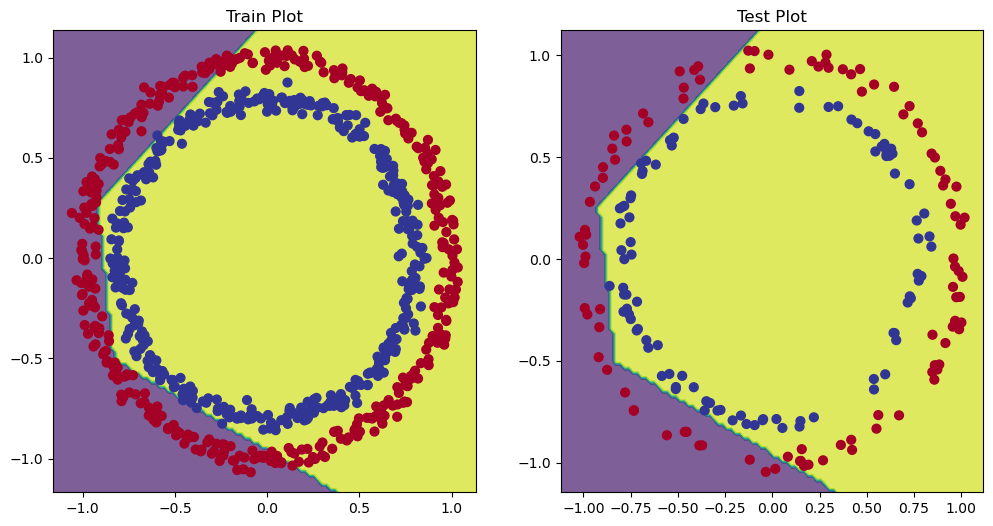

In [38]:
# Plot it
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train Plot")
plot_decision_boundary(model_final, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test Plot")
plot_decision_boundary(model_final, X_test, y_test)


## Plot the loss (or training) curves

In [39]:
# Convert history into dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.693151,0.51875
1,0.685571,0.53000
2,0.681000,0.52875
3,0.671159,0.56125
4,0.663727,0.58750
5,0.656148,0.59125
6,0.646365,0.61375
7,0.644834,0.61500
8,0.636190,0.64250
9,0.624680,0.61875


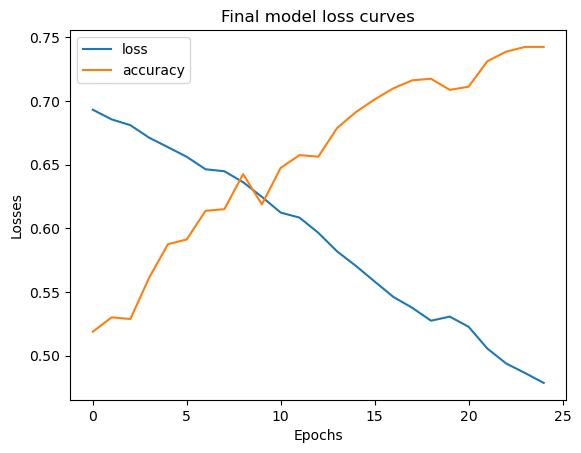

In [40]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Final model loss curves")
plt.legend();

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to ground truth lables).

## Finding the best learning rate

To find ideal learning rate we are going to use the following steps:

* A learninh rate **callback** - A callback is an extra piece of funtionally, you can add to your *while* its training.
* Another model
* A modified loss curve plot

In [41]:
# Set random seed
tf.random.set_seed(42)

# Build a model
model_learning_rate = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile a model
model_learning_rate.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(0.01),
    metrics=["accuracy"]
)

# Create a learning callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# Fit the model (pass lr_scheduler callback)
history = model_learning_rate.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

<Axes: xlabel='Epochs'>

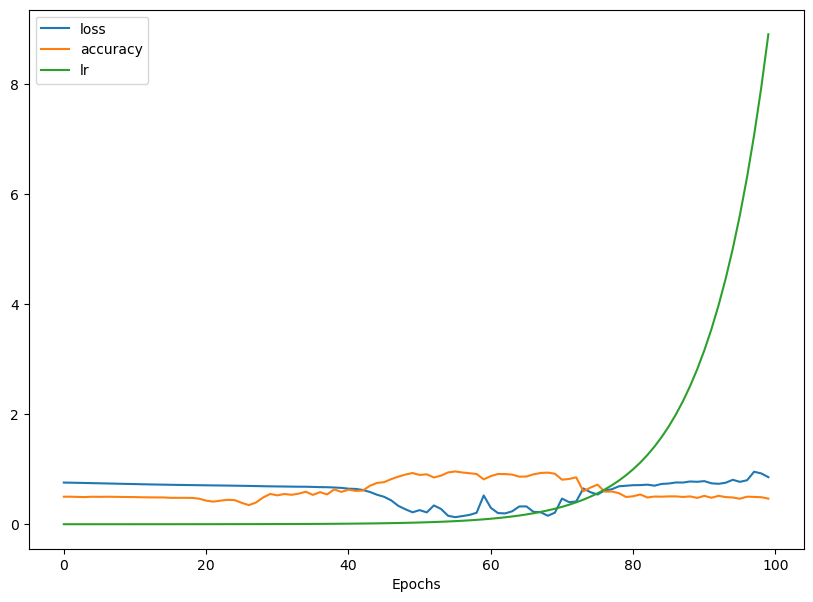

In [42]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="Epochs")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


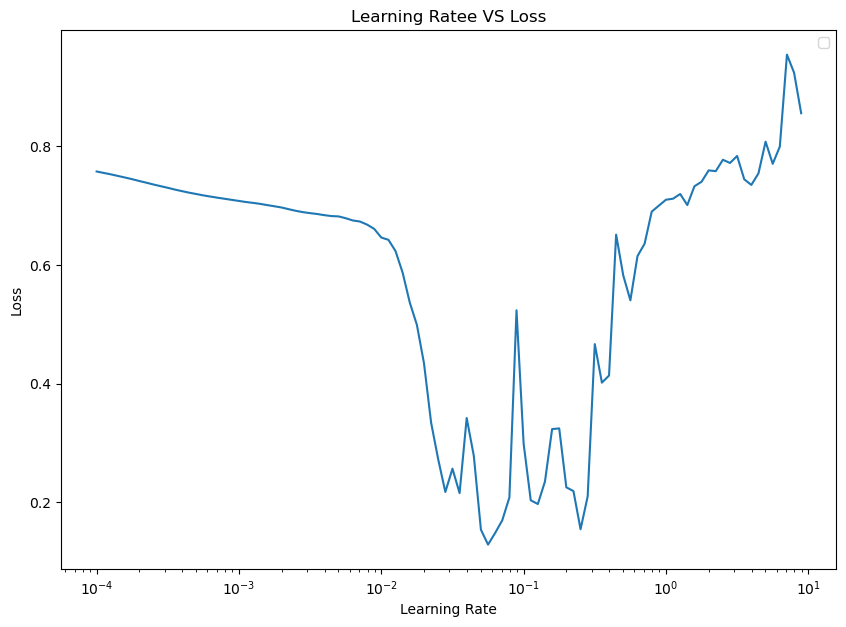

In [43]:
# Plot the learning rate values V.S loss
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Ratee VS Loss")
plt.legend();


In [44]:
# Example of other typicla learning rates values:
1, 0.1, 0.01, 0.001, 0.0001

(1, 0.1, 0.01, 0.001, 0.0001)

## More classification evaluation methods

Alongside visuallize our models results as much as possible, there are a handful of other classification revaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Conusion matrix
* Classification report (from scikit-learn)

In [45]:
# Check the accuracy of our model
loss, accuracy = model_final.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.5082 - accuracy: 0.6950
Model loss on the test set: 0.5081585645675659
Model accuracy on the test set: 69.50%


How about confusion matrix?

In [46]:
# Create a confusion matrix

# Make predictions
y_pred = model_final.predict(X_test)

print(y_pred[:10])
print(y_test[:10])

# Converst predictions array into 0 and 1
y_pred = tf.round(y_pred)

# Create matrix
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 424us/step
[[0.6127609 ]
 [0.6251585 ]
 [0.6528633 ]
 [0.78689045]
 [0.65452594]
 [0.13251093]
 [0.6315203 ]
 [0.07302456]
 [0.6017834 ]
 [0.585095  ]]
[1 1 1 1 0 0 1 0 1 0]


array([[40, 61],
       [ 0, 99]])

How about we prettify our confusion matrix?

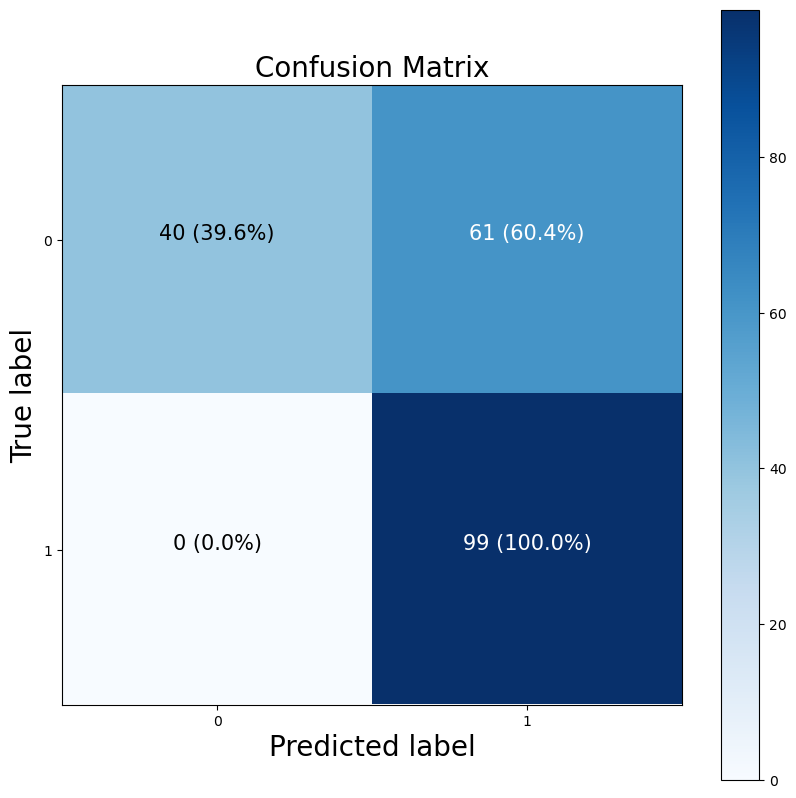

In [47]:
# Note: the confusion matrix code we're about to write is a mix with sklearn plot with confusion_matrix function

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set X-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)



# Working a larger example(multiclass classifiction) 🥶

When you have more than two or more classes as an option, it's known as **multiclass classification**

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [48]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [49]:
# Show the first example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [50]:
# Check the shape of single example
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [51]:
# Create a small list of class name that we can index to labels
class_names=["T-shirt/top",
             "Trouser",
             "Pullover",
             "Dress",
             "Coat",
             "Sandal",
             "Shirt",
             "Sneaker",
             "Bag",
             "Ankle boot"]

len(class_names)

10

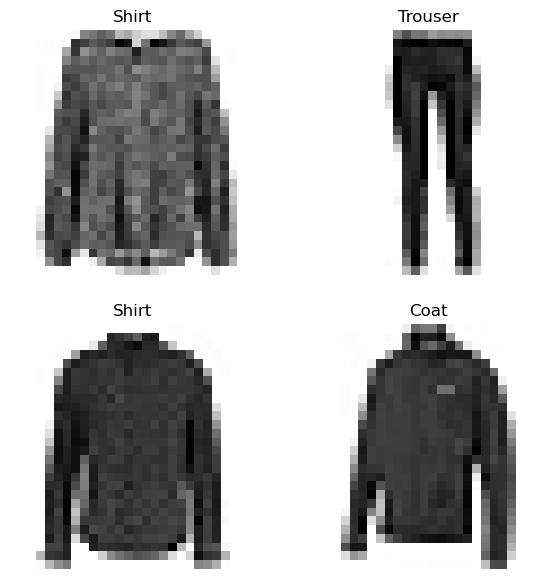

In [52]:
# Plot multiple random images of fashion image
plt.figure(figsize=(7, 7))

for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)



## Building a Multi-Class Model

For our multi-class classification model most of them are same as binary classification. However there are some things we might need to tweek.

* input_shape = 28 X 28 ( shape of one image)
* output_shape = 10 (one per calss of clothing)
* loss function = tf.keras.losses.**`CategoricalCrossentropy()`** 👈(For one hot representation) / **`SparseCategoricalCrossentropy()`** 👈(Multi representation)
    * If lables is not one-hot encoded use `tf.one_hot()`
* output layer activation = "Softmax" (not sigmoid)

In [53]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Our data need to be flattened
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile a model
model_11.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(), 
    optimizer = tf.keras.optimizers.Adam(), 
    metrics = ["accuracy"]
    )

# Fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, verbose=1, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))



Epoch 1/10
1875/1875 [==============================] - 1s 510us/step - loss: 2.6298 - accuracy: 0.1134 - val_loss: 2.2587 - val_accuracy: 0.1194
Epoch 2/10
1875/1875 [==============================] - 1s 456us/step - loss: 2.2185 - accuracy: 0.1383 - val_loss: 2.1558 - val_accuracy: 0.1653
Epoch 3/10
1875/1875 [==============================] - 1s 426us/step - loss: 1.9287 - accuracy: 0.2059 - val_loss: 1.7570 - val_accuracy: 0.2561
Epoch 4/10
1875/1875 [==============================] - 1s 498us/step - loss: 1.7093 - accuracy: 0.2716 - val_loss: 1.6819 - val_accuracy: 0.2701
Epoch 5/10
1875/1875 [==============================] - 1s 497us/step - loss: 1.6524 - accuracy: 0.2876 - val_loss: 1.6354 - val_accuracy: 0.2849
Epoch 6/10
1875/1875 [==============================] - 1s 467us/step - loss: 1.6243 - accuracy: 0.2896 - val_loss: 1.6165 - val_accuracy: 0.2880
Epoch 7/10
1875/1875 [==============================] - 1s 497us/step - loss: 1.6095 - accuracy: 0.2895 - val_loss: 1.6040 -

In [54]:
# Check model summary
model_11.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 4)                 3140      
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Check the min and max value of the training data
train_data.min(), train_data.max()

(0, 255)

Neural network prefer data to be scaled (or mormalize), this means they like to have numbers between 0 and 1.

In [56]:
# We can get our train and test data between 0&1 by deviding by the maximun.
train_data_norm = train_data/255.
test_data_norm = test_data/255.

# Check the min and max
train_data.min(), train_data_norm.max()

(0, 1.0)

### Now our data has been normalize!!  🤖

In [57]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Our data need to be flattened
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile a model
model_12.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(), 
    optimizer = tf.keras.optimizers.legacy.Adam(), 
    metrics = ["accuracy"]
    )

# Fit the model
norm_history = model_12.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=10, verbose=1, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))



Epoch 1/10
1875/1875 [==============================] - 1s 473us/step - loss: 1.1374 - accuracy: 0.5384 - val_loss: 0.8934 - val_accuracy: 0.6419
Epoch 2/10
1875/1875 [==============================] - 1s 409us/step - loss: 0.8369 - accuracy: 0.6704 - val_loss: 0.8324 - val_accuracy: 0.6792
Epoch 3/10
1875/1875 [==============================] - 1s 414us/step - loss: 0.7769 - accuracy: 0.7076 - val_loss: 0.7854 - val_accuracy: 0.7178
Epoch 4/10
1875/1875 [==============================] - 1s 451us/step - loss: 0.7235 - accuracy: 0.7359 - val_loss: 0.7324 - val_accuracy: 0.7396
Epoch 5/10
1875/1875 [==============================] - 1s 473us/step - loss: 0.6799 - accuracy: 0.7535 - val_loss: 0.6965 - val_accuracy: 0.7502
Epoch 6/10
1875/1875 [==============================] - 1s 453us/step - loss: 0.6495 - accuracy: 0.7641 - val_loss: 0.6872 - val_accuracy: 0.7546
Epoch 7/10
1875/1875 [==============================] - 1s 445us/step - loss: 0.6308 - accuracy: 0.7725 - val_loss: 0.6910 -

🔞 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized(number between 0&1)

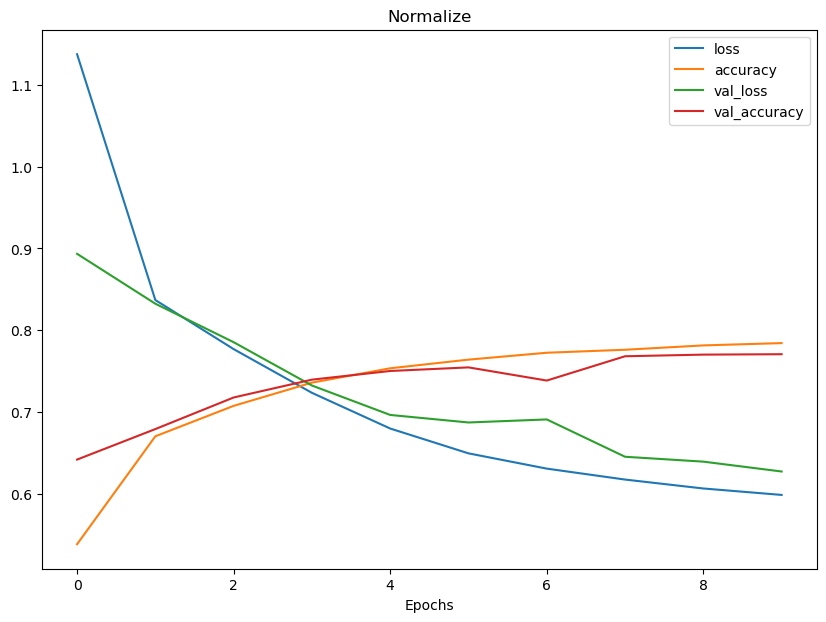

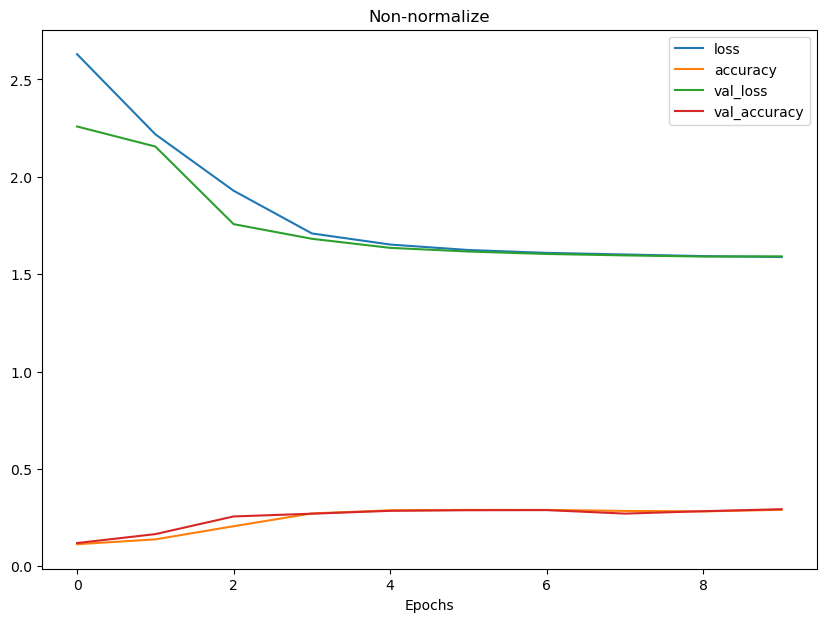

In [58]:
# Checkout the history
pd.DataFrame(norm_history.history).plot(figsize=(10, 7), xlabel="Epochs", title="Normalize");
pd.DataFrame(non_norm_history.history).plot(figsize=(10, 7), xlabel="Epochs", title="Non-normalize");

> 🌨️ **Note:** THe same model with even *slightly* differenct data can produce *dramatically* difference result.

### Finding the ideal learning rate

In [59]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Our data need to be flattened
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile a model
model_13.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(), 
    optimizer = tf.keras.optimizers.legacy.Adam(), 
    metrics = ["accuracy"]
    )

# Create a learning callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm, tf.one_hot(train_labels, depth=10), 
                               epochs=40, 
                               verbose=0, 
                               validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)), 
                               callbacks=[lr_scheduler])

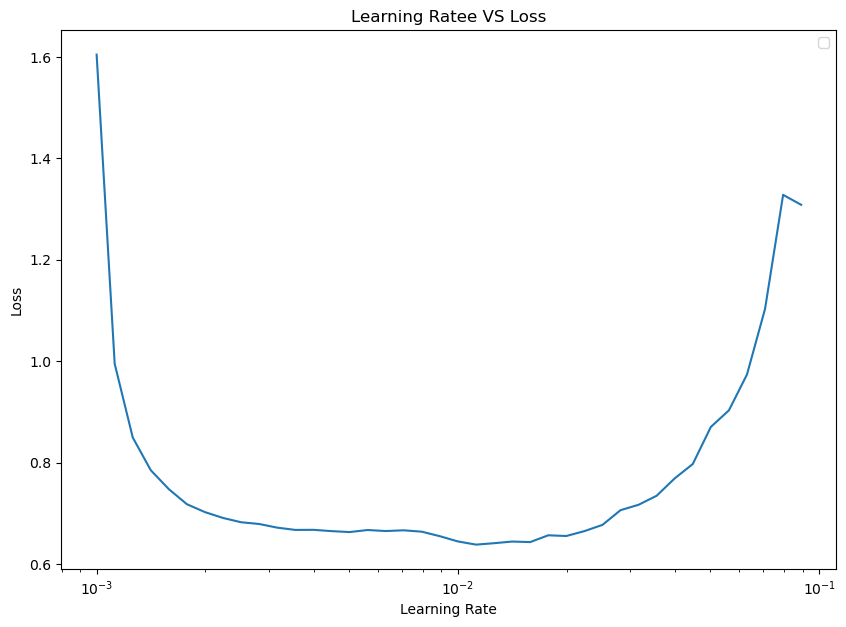

In [60]:
# Plot the learning rate values V.S loss
lrs = 1e-3*(10**(tf.range(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Ratee VS Loss")
plt.legend();


<center> Lr = 0.001 will be the best!!! </center>

In [61]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Our data need to be flattened
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile a model
model_14.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(), 
    optimizer = tf.keras.optimizers.legacy.Adam(), 
    metrics = ["accuracy"]
    )

# Fit the model
best_lr_history = model_14.fit(train_data_norm, 
                    tf.one_hot(train_labels, depth=10), 
                    epochs=30, verbose=0, 
                    validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))



## Evaluating our multiclass classification model

We could:

* Evaluate performance using other metrics
* Assess some of predictions (Visualization)
* Improve its results
* Save and ecpore it

Let's go through top 2

In [62]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize = (10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set X-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)



In [63]:
# Make predictions
y_probs = model_14.predict(test_data_norm)


# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 predictions labels
y_preds[:10]

  1/313 [..............................] - ETA: 7s

313/313 [==============================] - 0s 255us/step


array([9, 2, 1, 1, 6, 1, 4, 2, 5, 7])

In [64]:
# Create confusion matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[771,   2,  16, 132,  11,   0,  59,   0,   9,   0],
       [ 11, 934,   1,  46,   2,   0,   6,   0,   0,   0],
       [ 42,   0, 652,  18, 155,   1, 125,   0,   7,   0],
       [ 49,   8,   6, 850,  15,  13,  51,   0,   8,   0],
       [  5,   0, 245,  34, 597,   0,  93,   0,  26,   0],
       [  0,   0,   0,   5,   0, 891,   0,  45,   8,  51],
       [201,   2, 267, 114, 159,   0, 242,   0,  15,   0],
       [  0,   0,   0,   0,   0,  29,   0, 920,   0,  51],
       [  1,   0,   7,  13,  46,  36,  12,   4, 881,   0],
       [  0,   0,   0,   2,   0,  10,   1,  36,   0, 951]])

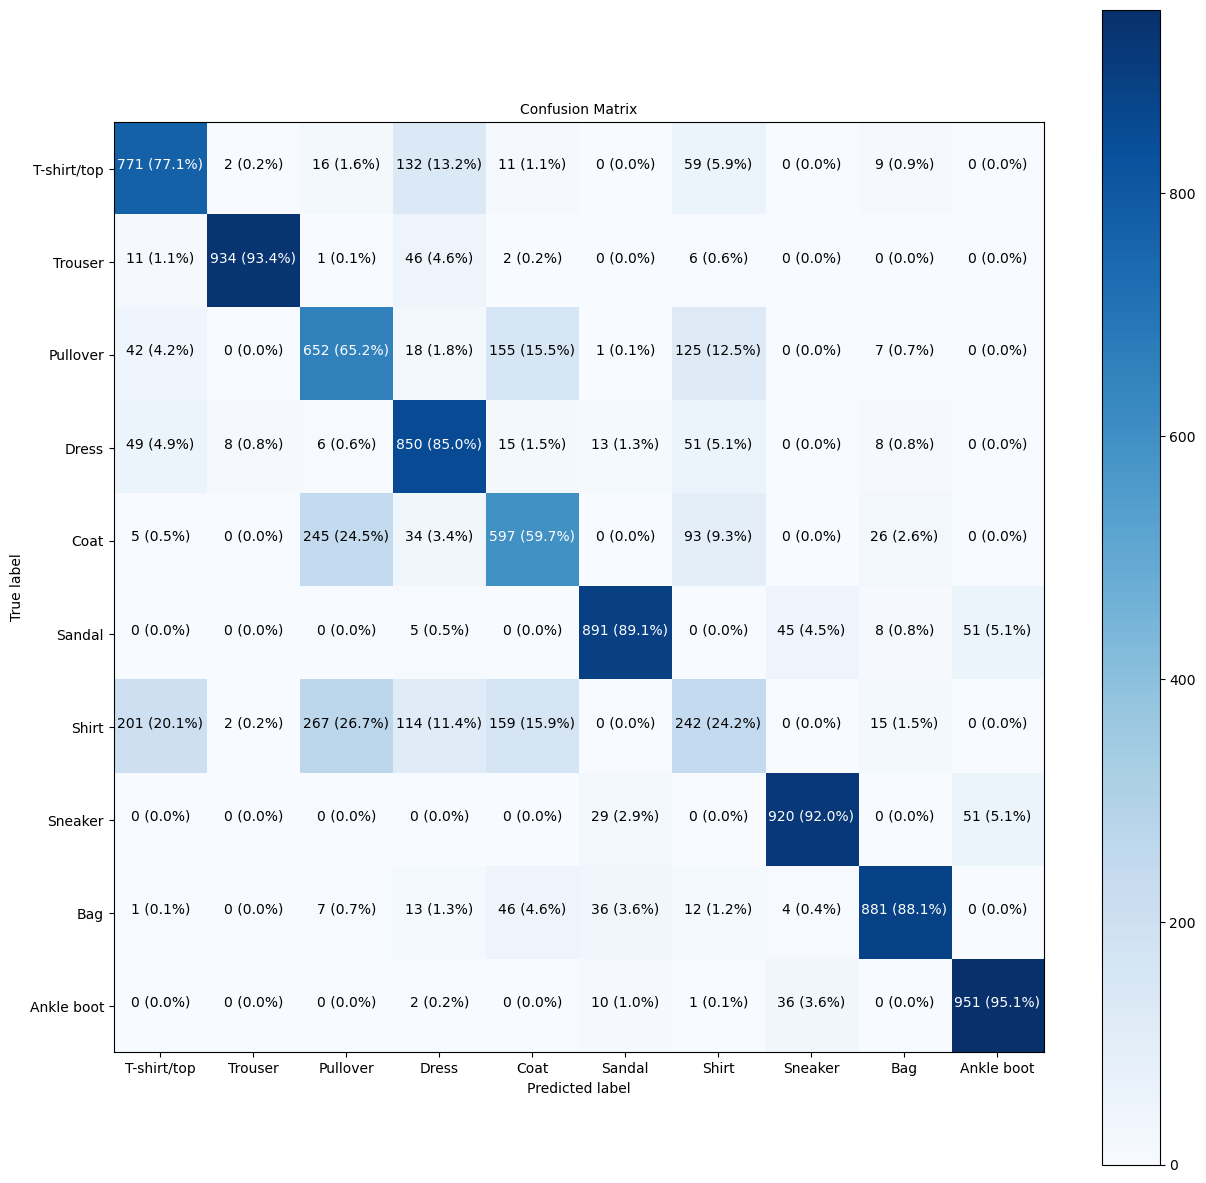

In [65]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> 🔐 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random mage
* Make a prediction on said image
* Label the plot with the truth label & the prediction label 

In [66]:
def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """

    # Setup random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red

1/1 [==============================] - 0s 10ms/step


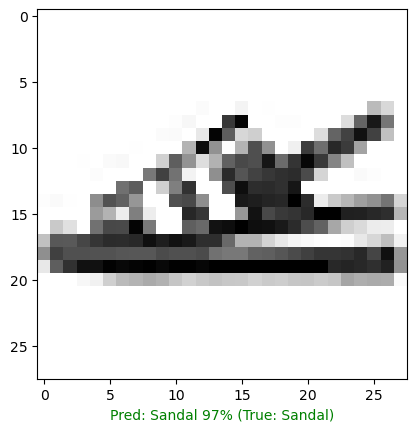

In [67]:
plot_random_image(model_14, test_data_norm, test_labels, class_names)

## What patterns is our model learning

In [68]:
# Find the layers of our most recent model
model_14.layers

In [69]:
# Extract particular layer
model_14.layers[1]

In [70]:
# Get the pattern of the layer in our network
weight, biases = model_14.layers[1].get_weights()

# Shapes
weight, weight.shape, 784==28*28

(array([[-0.892528  ,  0.3801045 ,  0.4573901 ,  1.0351522 ],
        [-1.2604545 ,  1.3317783 , -0.6577518 ,  1.2458515 ],
        [-1.4335938 ,  1.441079  ,  1.0982484 ,  1.2781157 ],
        ...,
        [-0.25795585, -0.06483909,  0.30454096, -0.27601182],
        [-0.5224658 ,  0.14379601,  0.06042568, -0.52702874],
        [-1.112928  ,  0.478169  ,  0.7679532 ,  0.2974656 ]],
       dtype=float32),
 (784, 4),
 True)

In [71]:
model_14.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out bias vector...

In [72]:
biases, biases.shape

(array([ 1.844697 , -1.3913535,  1.9720551,  3.8508   ], dtype=float32), (4,))

Every neuron has a bias vector. Each of there is paried with a weights matrix.

The bias vector get intialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

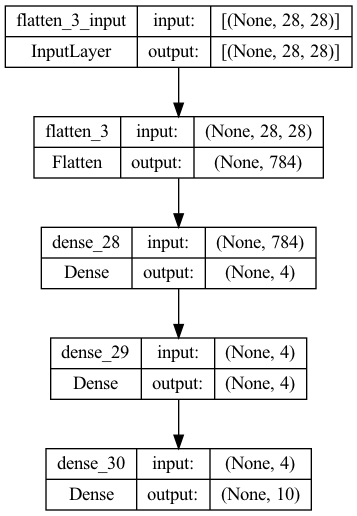

In [74]:
# Se the inputs and outputs of wach layers
plot_model(model_14, show_shapes=True)